In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
import os
import random
from shutil import copyfile
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10894436467494983383
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9857662976
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1027265635827150713
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4080 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9"
xla_global_id: 416903419
]


In [19]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    './Dataset/Train/',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    './Dataset/Test/',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    './dataset/validation/',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

Found 960 images belonging to 4 classes.
Found 80 images belonging to 4 classes.
Found 118 images belonging to 4 classes.


In [20]:
model = tf.keras.models.Sequential([
    #konvolusi pertama
    # Depth 16, kernel size 3x3 matrix
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same', kernel_initializer='he_normal', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #konvolusi kedua
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', kernel_initializer='he_normal'), tf.keras.layers.MaxPooling2D(2,2),
    #konvolusi ketiga
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same', kernel_initializer='he_normal'), tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same', kernel_initializer='he_normal'), tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same', kernel_initializer='he_normal'), tf.keras.layers.MaxPooling2D(2,2),
    #flatten dropout
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    #fully connected layers
    tf.keras.layers.Dense(128, activity_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(4, activation='softmax')    #ubah dense dari 6 menjadi 4 (tf.keras.layers.Dense(4, activation='softmax'))
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator, steps_per_epoch=3, epochs=200, validation_data=validation_generator, validation_steps=3
)



Epoch 1/200
3/3 [==============================] - 1s 201ms/step - loss: 1.8590 - accuracy: 0.2500 - val_loss: 1.1296 - val_accuracy: 0.8375
Epoch 2/200
3/3 [==============================] - 0s 138ms/step - loss: 1.0784 - accuracy: 0.6667 - val_loss: 0.9500 - val_accuracy: 0.6625
Epoch 3/200
3/3 [==============================] - 0s 143ms/step - loss: 0.8339 - accuracy: 0.7083 - val_loss: 0.5122 - val_accuracy: 0.9125
Epoch 4/200
3/3 [==============================] - 0s 142ms/step - loss: 0.4762 - accuracy: 0.8854 - val_loss: 0.3271 - val_accuracy: 0.9750
Epoch 5/200
3/3 [==============================] - 0s 140ms/step - loss: 0.3981 - accuracy: 0.9062 - val_loss: 0.2933 - val_accuracy: 0.9500
Epoch 6/200
3/3 [==============================] - 0s 135ms/step - loss: 0.2280 - accuracy: 0.9792 - val_loss: 0.2278 - val_accuracy: 0.9750
Epoch 7/200
3/3 [==============================] - 0s 145ms/step - loss: 0.1967 - accuracy: 0.9792 - val_loss: 0.2106 - val_accuracy: 0.9625
Epoch 8/200
3

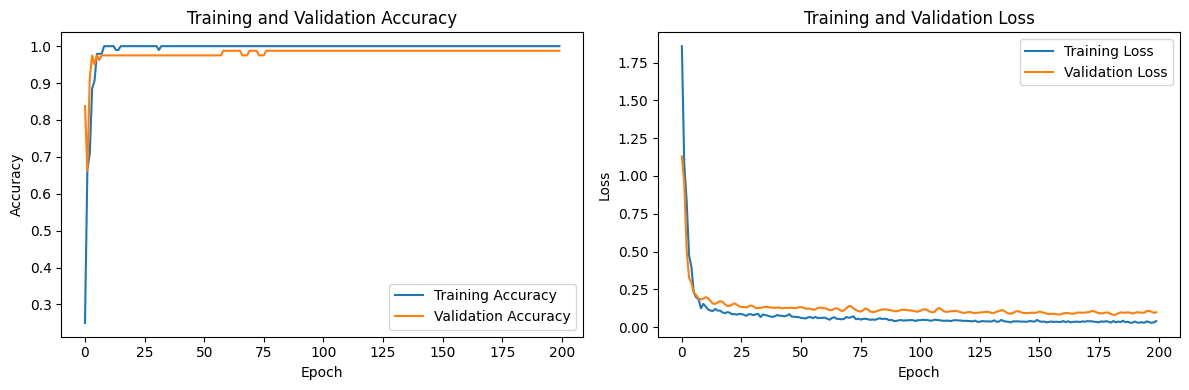

In [21]:
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [26]:
y_pred_classes

array([3, 2, 2, 1, 3, 3, 3, 2, 2, 2, 1, 0, 0, 2, 0, 3, 2, 1, 2, 3, 3, 0,
       2, 3, 2, 3, 3, 1, 2, 1, 2, 1, 1, 2, 1, 0, 0, 0, 1, 3, 1, 2, 1, 0,
       1, 2, 3, 3, 2, 3, 2, 0, 2, 3, 3, 0, 0, 3, 2, 3, 1, 1, 1, 3, 0, 0,
       3, 3, 1, 2, 1, 3, 0, 0, 0, 1, 3, 0, 2, 0, 0, 1, 0, 1, 3, 3, 1, 2,
       1, 3, 2, 2, 3, 0, 3, 2, 1, 0, 0, 0, 3, 0, 0, 1, 3, 3, 1, 2, 3, 1,
       2, 0, 0, 3, 3, 2, 1, 2], dtype=int64)

In [27]:
true_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3])

In [30]:
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes
true_classes = test_generator.classes

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Generate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

print("Confusion Matrix:")
print(conf_matrix)

# Generate and print classification report
class_report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:")
print(class_report)

4/4 [==============================] - 0s 71ms/step
Confusion Matrix:
[[ 9  4  6  9]
 [ 7 10  5  7]
 [ 5  7  8  9]
 [ 7  6 10  9]]
Classification Report:
                 precision    recall  f1-score   support

          busuk       0.32      0.32      0.32        28
         matang       0.37      0.34      0.36        29
         mentah       0.28      0.28      0.28        29
setengah matang       0.26      0.28      0.27        32

       accuracy                           0.31       118
      macro avg       0.31      0.31      0.31       118
   weighted avg       0.31      0.31      0.31       118



In [23]:
# Save the Trained Model
model.save('trained_model.h5')
# Convert to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmprr8upjez\assets


INFO:tensorflow:Assets written to: C:\Users\user\AppData\Local\Temp\tmprr8upjez\assets
